# Install and Import dependencies 



In [166]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Loading the Holistic Approach

In [167]:
mp_holistic = mp.solutions.holistic  #holistic model
mp_drawing = mp.solutions.drawing_utils

In [168]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [169]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [170]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [171]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [172]:


draw_landmarks(frame, results)


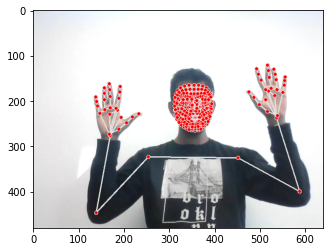

In [173]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoints

In [174]:
len(results.left_hand_landmarks.landmark)

21

In [175]:
# appending all values to a list
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [176]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [177]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [178]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [179]:
result_test = extract_keypoints(results)

In [180]:
result_test

array([ 0.56535411,  0.45106429, -0.86968338, ...,  0.21683238,
        0.39828113, -0.01813665])

In [181]:
np.save('0', result_test)
# 0.npy

In [182]:
np.load('0.npy')

array([ 0.56535411,  0.45106429, -0.86968338, ...,  0.21683238,
        0.39828113, -0.01813665])

# Setup Folders for Collection

In [183]:
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
# actions = np.array(['hello', 'thanks', 'iloveyou','Book', 'drink','Computer', 'chair','candy','help','study','family','medicine','party','money','race'])
actions = np.array(['hello', 'thanks', 'iloveyou','Book', 'drink','Computer', 'chair','candy','help','study','family','medicine','party','money','race'])
# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [184]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing

In [185]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), #(x,y)
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [186]:
cap.release()
cv2.destroyAllWindows()

# Presprocess Data and Create Labels and features

In [187]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [188]:
label_map = {label:num for num, label in enumerate(actions)}


In [189]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'Book': 3,
 'drink': 4,
 'Computer': 5,
 'chair': 6,
 'candy': 7,
 'help': 8,
 'study': 9,
 'family': 10,
 'medicine': 11,
 'party': 12,
 'money': 13,
 'race': 14}

In [190]:


sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [191]:
np.array(sequences).shape
# 90 videos , 30 frames each with 1662 keypoints ``

(450, 30, 1662)

In [192]:
np.array(window).shape

(30, 1662)

In [193]:
np.array(labels).shape

(450,)

In [194]:
X = np.array(sequences)

In [195]:
X.shape

(450, 30, 1662)

In [196]:
y = to_categorical(labels).astype(int)

In [197]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [198]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size=0.05)

In [199]:
x_train.shape 

(427, 30, 1662)

In [200]:
y_test.shape 

(23, 15)

# Build and Train LSTM Neural Network 

In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [202]:
# log directory and setup tensor board call back 
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)


In [203]:
# Neural Network Architecture 
model = Sequential()
model.add(LSTM(64 , return_sequences = True , activation = 'relu', input_shape = (30, 1662))) #64 LSTM units not layers
model.add(LSTM(128 , return_sequences = True , activation = 'relu'))
model.add(LSTM(64 , return_sequences = False  , activation = 'relu')) # we don't need to return sequences to the next layer as it is a Dense Layer
model.add(Dense(64 , activation= 'relu')) # Fully connected layers --> Dense 
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(actions.shape[0] , activation = 'softmax')) # actions.shape[0] = 3

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_13 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 15)                495       
                                                                 
Total params: 597,071
Trainable params: 597,071
Non-tr

In [207]:
model.compile(optimizer='Adam' , loss = 'categorical_crossentropy' , metrics= ['accuracy'])


In [244]:
x_test.shape

(23, 30, 1662)

In [237]:
model.fit(x_train , y_train , epochs= 20 ,validation_data=(x_test,y_test)) 
# callbacks=[tb_callback])


Epoch 1/20
14/14 [==============================] - 6s 255ms/step - loss: 6.4320e-05 - accuracy: 1.0000 - val_loss: 0.1536 - val_accuracy: 0.9565
Epoch 2/20
14/14 [==============================] - 3s 237ms/step - loss: 5.2132e-05 - accuracy: 1.0000 - val_loss: 0.1531 - val_accuracy: 0.9565
Epoch 3/20
14/14 [==============================] - 3s 227ms/step - loss: 4.6642e-05 - accuracy: 1.0000 - val_loss: 0.1417 - val_accuracy: 0.9565
Epoch 4/20
14/14 [==============================] - 3s 243ms/step - loss: 4.0673e-05 - accuracy: 1.0000 - val_loss: 0.1328 - val_accuracy: 0.9565
Epoch 5/20
14/14 [==============================] - 3s 235ms/step - loss: 3.5067e-05 - accuracy: 1.0000 - val_loss: 0.1305 - val_accuracy: 0.9565
Epoch 6/20
14/14 [==============================] - 3s 237ms/step - loss: 3.1849e-05 - accuracy: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.9565
Epoch 7/20
14/14 [==============================] - 3s 233ms/step - loss: 2.8335e-05 - accuracy: 1.0000 - val_loss: 0.1340 -

In [301]:
model.save('bangaya.h5')

In [210]:
import keras
model = keras.models.load_model('bangaya.h5')

In [238]:
y_pred = model.predict(x_test)


In [239]:
from sklearn.metrics import confusion_matrix, accuracy_score
ytrue = np.argmax(y_test, axis=1)
yhat = np.argmax(y_pred, axis=1)

<AxesSubplot:>

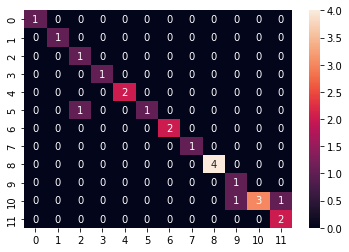

In [243]:
import seaborn as sns
cm = confusion_matrix(yhat,ytrue)
sns.heatmap(cm, annot =True)

In [242]:
print(classification_report(yhat, ytrue,))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          13       1.00      0.60      0.75         5
          14       0.67      1.00      0.80         2

    accuracy                           0.87        23
   macro avg       0.89      0.92      0.88        23
weighted avg       0.93      0.87      0.87        23



In [218]:
accuracy_score(ytrue, yhat)

0.9565217391304348

In [263]:
# colors = [(245,117,16), (117,245,16), (16,117,245)]
colors = [(245,117,16), (117,245,16), (16,117,245),(16,117,245),(16,117,245),(16,117,245),(16,117,245),(16,117,245),(16,117,245),(16,117,245),
(16,117,245),(16,117,245),(16,117,245),(16,117,245),(16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1, cv2.LINE_AA)
        
    return output_frame

In [264]:
res

array([1.93790928e-01, 6.40488565e-02, 2.86782384e-01, 8.79483856e-03,
       2.69252270e-01, 5.14662825e-02, 5.14038547e-04, 1.22167915e-01,
       4.53625507e-05, 8.30743920e-06, 2.91781849e-04, 9.43242924e-07,
       2.60291708e-04, 8.74017223e-06, 2.56706472e-03], dtype=float32)

In [294]:
colors = [(245,117,16), (117,245,16), (126, 211, 33),(16,117,245),(16,117,245),(16,117,245),(16,117,245),(16,117,245),(16,117,245),(16,117,245),
(16,117,245),(16,117,245),(16,117,245),(16,117,245),(16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,80+num*25), (int(prob*120), 110+num*250), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

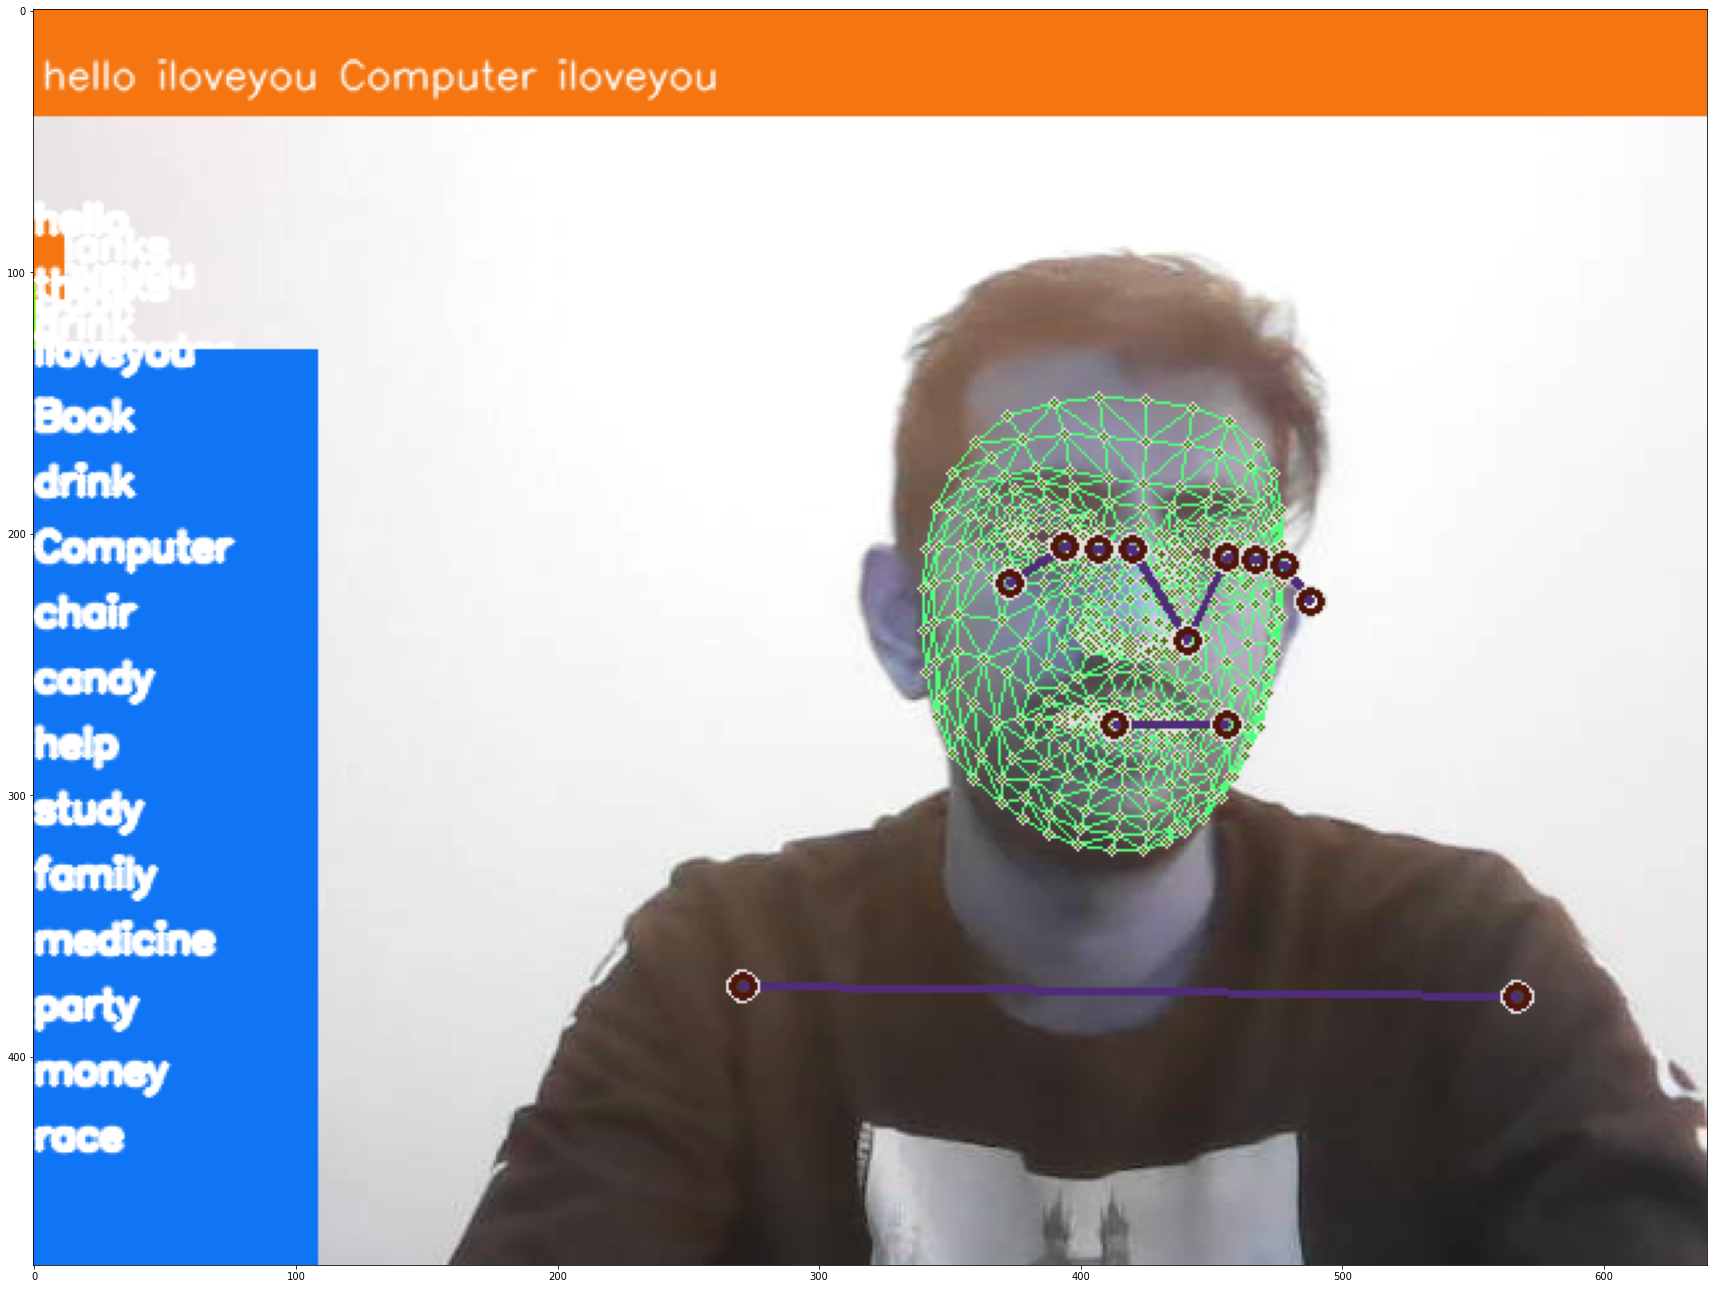

In [295]:
plt.figure(figsize=(30,30))
plt.imshow(prob_viz(res, actions, image, colors))

In [296]:
sequence.reverse()


In [300]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 10: 
                sentence = sentence[-10:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        
        # Show to screen
        # c = cv2.resize(image,(570,1000))
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [280]:
cv2.putText??

Docstring:
putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
.   @brief Draws a text string.
.   
.   The function cv::putText renders the specified text string in the image. Symbols that cannot be rendered
.   using the specified font are replaced by question marks. See #getTextSize for a text rendering code
.   example.
.   
.   @param img Image.
.   @param text Text string to be drawn.
.   @param org Bottom-left corner of the text string in the image.
.   @param fontFace Font type, see #HersheyFonts.
.   @param fontScale Font scale factor that is multiplied by the font-specific base size.
.   @param color Text color.
.   @param thickness Thickness of the lines used to draw a text.
.   @param lineType Line type. See #LineTypes
.   @param bottomLeftOrigin When true, the image data origin is at the bottom-left corner. Otherwise,
.   it is at the top-left corner.
Type:      builtin_function_or_method


In [250]:


cap.release()
cv2.destroyAllWindows()
